In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
#Reading the csv file. 
#After initial load it looks that we have some datetime data so we will use it as index column
df = pd.read_csv(r'C:\Users\petur\Python Repository\Shopify Challenge\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', header=0,index_col='created_at', parse_dates=True)

In [64]:
#Let's see...
df.head(5)


,order_id,shop_id,user_id,order_amount,total_items,payment_method
created_at,,,,,,
2017-03-13 12:36:56,1,53,746,224,2,cash
2017-03-03 17:38:52,2,92,925,90,1,cash
2017-03-14 04:23:56,3,44,861,144,1,cash
2017-03-26 12:43:37,4,18,935,156,1,credit_card
2017-03-01 04:35:11,5,18,883,156,1,credit_card


In [65]:
df.isnull().sum()
#OK, no missing values

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
dtype: int64

In [66]:
#One additional parameter (Unit_Price) could help us reveal abnormalities
df['unit_price'] = df['order_amount']/df['total_items']
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,unit_price
created_at,,,,,,,
2017-03-13 12:36:56,1,53,746,224,2,cash,112.0
2017-03-03 17:38:52,2,92,925,90,1,cash,90.0
2017-03-14 04:23:56,3,44,861,144,1,cash,144.0
2017-03-26 12:43:37,4,18,935,156,1,credit_card,156.0
2017-03-01 04:35:11,5,18,883,156,1,credit_card,156.0


In [67]:
df.groupby('unit_price')['order_amount'].count().nlargest(10)

unit_price
153.0    256
160.0    206
142.0    197
156.0    197
164.0    161
176.0    152
133.0    151
130.0    150
177.0    148
129.0    142
Name: order_amount, dtype: int64

In [68]:
df.describe()
#Preliminary look shows some interesting insights - columns 
#'order_amount', 'total_items' and 'unit_price' have widely dispersed values

,order_id,shop_id,user_id,order_amount,total_items,unit_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


<AxesSubplot:xlabel='count', ylabel='unit_price'>

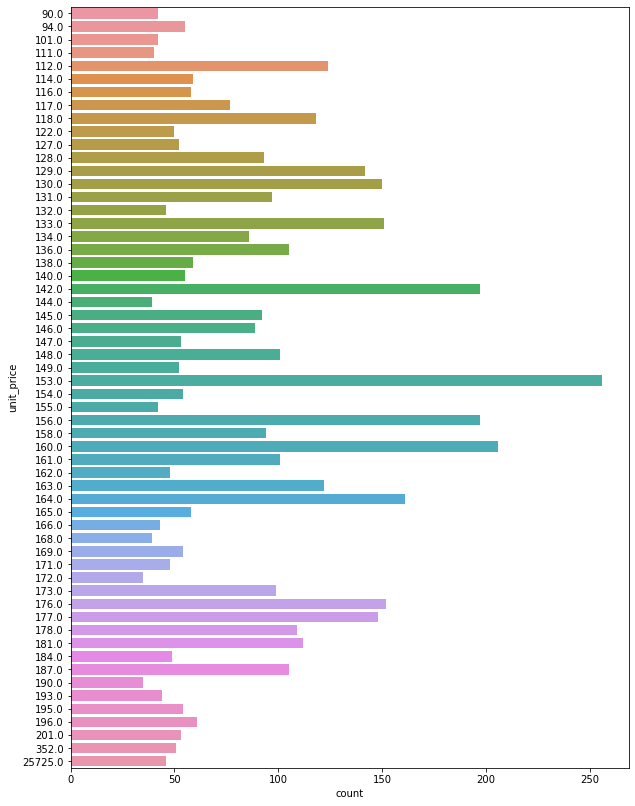

In [69]:
#It looks like someone is selling very expensive sneakers ($25 725/pair) and that skews greatly the 'order_amount' column values
fig,ax = plt.subplots(figsize=(10,14))
sns.countplot(y=df['unit_price'])

In [70]:
df['total_items'].value_counts()
# I can bet that the big order volumes (total_items=2000) are the one generating huge order_amount-s

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

In [71]:
df[df['total_items']==2000]
#These huge regular orders are definetly skewing our AOV

,order_id,shop_id,user_id,order_amount,total_items,payment_method,unit_price
created_at,,,,,,,
2017-03-07 04:00:00,16,42,607,704000,2000,credit_card,352.0
2017-03-04 04:00:00,61,42,607,704000,2000,credit_card,352.0
2017-03-02 04:00:00,521,42,607,704000,2000,credit_card,352.0
2017-03-24 04:00:00,1105,42,607,704000,2000,credit_card,352.0
2017-03-15 04:00:00,1363,42,607,704000,2000,credit_card,352.0
2017-03-11 04:00:00,1437,42,607,704000,2000,credit_card,352.0
2017-03-19 04:00:00,1563,42,607,704000,2000,credit_card,352.0
2017-03-17 04:00:00,1603,42,607,704000,2000,credit_card,352.0
2017-03-12 04:00:00,2154,42,607,704000,2000,credit_card,352.0


<AxesSubplot:ylabel='order_amount'>

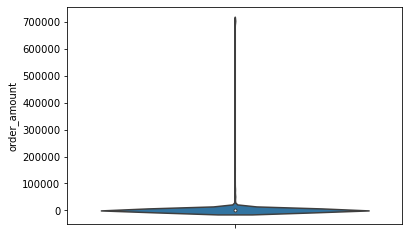

In [72]:
sns.violinplot(y=df['order_amount'])
#Due to a handful of users with big order amount the whole 'order_amount' column gets highly skewed

In [73]:
# The top 5 users have wastly different average order values
print(df.groupby('user_id')['order_amount'].mean().nlargest(5))

user_id
607    704000.000000
878     14266.909091
766      8007.600000
834      6019.000000
915      5785.142857
Name: order_amount, dtype: float64


## Instead of 'order_amount' mean it would make more sence to use another metric which is not that highly influenced by "outliers" - median is a reasonable choice in this case

In [74]:
df['order_amount'].median()

284.0

### Question 2 

In [75]:
df[['order_amount','total_items','unit_price']]


,order_amount,total_items,unit_price
created_at,,,
2017-03-13 12:36:56,224,2,112.0
2017-03-03 17:38:52,90,1,90.0
2017-03-14 04:23:56,144,1,144.0
2017-03-26 12:43:37,156,1,156.0
2017-03-01 04:35:11,156,1,156.0
...,...,...,...
2017-03-30 13:47:17,330,2,165.0
2017-03-16 20:36:16,234,2,117.0
2017-03-19 05:42:42,351,3,117.0


URL : https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL

### A) How many orders were shipped by Speedy Express in total?

### B) What is the last name of the employee with the most orders?

Answer : Peacock

### C) What product was ordered the most by customers in Germany?

Answer : Boston Crab Meat